In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
veri = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
X = veri.drop(columns=['Class'])
y = veri['Class']

In [4]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
olcekleyici = StandardScaler()
X_egitim_olcekli = olcekleyici.fit_transform(X_egitim)
X_test_olcekli = olcekleyici.transform(X_test)

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_egitim_olcekli, y_egitim)

RandomForestClassifier(random_state=42)

In [7]:
y_tahmin = model.predict(X_test_olcekli)

In [8]:
dogruluk = accuracy_score(y_test, y_tahmin)
print(f"Model Doğruluk Oranı: %{dogruluk * 100:.2f}")

Model Doğruluk Oranı: %92.54


In [9]:
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_tahmin))


Sınıflandırma Raporu:

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.88      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



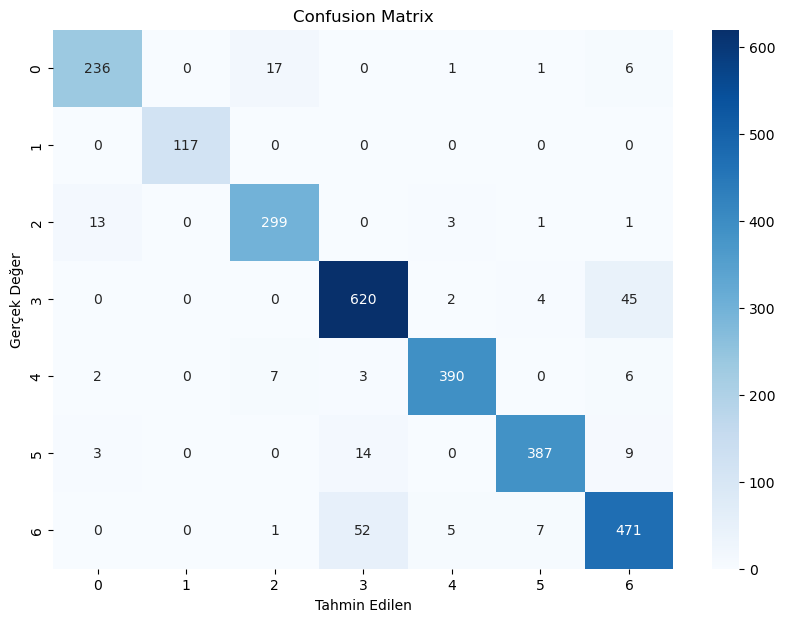

In [10]:
cm = confusion_matrix(y_test, y_tahmin)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import numpy as np

In [12]:
ozellikler = X.columns.tolist()

In [13]:
rastgele_veri = np.random.rand(1, len(ozellikler))

In [14]:
rastgele_veri_olcekli = olcekleyici.transform(rastgele_veri)

C:\Users\Eren\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
tahmin = model.predict(rastgele_veri_olcekli)

print("Rastgele Oluşturulan Değerler:")
for ozellik, deger in zip(ozellikler, rastgele_veri.flatten()):
    print(f"{ozellik}: {deger:.3f}")

print("\nModelin Tahmini Sınıf:", tahmin[0])

Rastgele Oluşturulan Değerler:
Area: 0.012
Perimeter: 0.115
MajorAxisLength: 0.490
MinorAxisLength: 0.391
AspectRation: 0.915
Eccentricity: 0.298
ConvexArea: 0.413
EquivDiameter: 0.200
Extent: 0.680
Solidity: 0.334
roundness: 0.659
Compactness: 0.834
ShapeFactor1: 0.070
ShapeFactor2: 0.796
ShapeFactor3: 0.336
ShapeFactor4: 0.310

Modelin Tahmini Sınıf: DERMASON
